**This is a sample code for giving you and idea on how to convert a text file to a NetworkX graph**

We have used the novel "Merchant of Venice" for this example , make sure you pick a different one.

google collab formalities :)

import necessary modules

In [1]:
!wget https://www.gutenberg.org/cache/epub/228/pg228.txt

--2024-09-19 16:38:44--  https://www.gutenberg.org/cache/epub/228/pg228.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 746807 (729K) [text/plain]
Saving to: ‘pg228.txt’

pg228.txt           100%[===================>] 729.30K  1.92MB/s    in 0.4s    

2024-09-19 16:38:45 (1.92 MB/s) - ‘pg228.txt’ saved [746807/746807]



In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Copy your file path, to open and read the file

(make sure the file is uploaded everytime you open colab)

In [3]:
path = '/content/pg228.txt'
with open(f'{path}', 'r') as f:
    text = f.read()

## Part - 1

### a. Pick your top characters and list them

In [4]:
characters = [
    "Aeneas",            # The Trojan hero and protagonist of the epic
    "Dido",              # The queen of Carthage who falls in love with Aeneas
    "Turnus",            # The Rutulian leader and Aeneas's chief antagonist
    "Juno",              # The queen of the gods who opposes Aeneas
    "Venus",             # The goddess of love and Aeneas's mother
    "Jupiter",           # The king of the gods
    "Neptune",           # The god of the sea
    "Mercury",           # The messenger of the gods
    "Ascanius",          # Aeneas's son
    "Anchises",          # Aeneas's father
    "Creusa",            # Aeneas's wife, who dies during the fall of Troy
    "Laocoön",           # A Trojan priest who warns against the wooden horse
    "Priam",             # The king of Troy
    "Hector",            # A Trojan prince and warrior, killed by Achilles
    "Achilles",          # The Greek hero whose ghost appears in the underworld
    "Turnus's Sister",   # A minor character related to Turnus
    "Amata",             # The wife of Latinus and mother of Lavinia
    "Lavinia",           # The daughter of Latinus, whom Aeneas marries
    "Latinus",           # The king of the Latins and father of Lavinia
    "Pallas",            # The young ally of Aeneas, killed by Turnus
    "Evander",           # The king of Pallanteum, an ally of Aeneas
    "Camilla",           # The warrior queen of the Volscians, allied with Turnus
    "Nisus",             # A Trojan warrior who undertakes a dangerous mission
    "Euryalus",          # Nisus's companion, who also participates in the mission
    "Sybil",             # The priestess of Apollo who guides Aeneas to the underworld
    "Mimnermus",         # A minor character involved in the epic's events
    "Tarchon",           # An ally of Aeneas, leader of the Etruscans
    "Sergestus",         # A minor Trojan figure who aids Aeneas
]


# replace the names of characters with the names in the list (Duke of Venice --> Duke_of_Venice)
for i in range(len(characters)):
    text = text.replace(characters[i], characters[i].replace(' ', '_'))

# split the text into sentences
sentences = text.split('.')

# remove the last element of the list as it is empty
sentences = sentences[:-1]

### b. Forming the graph

In [5]:
# using co-occurrence algorithm to find the co-occurrence of characters in the sentences
co_occurrence = []

for i in range(len(sentences)):
    for j in range(len(characters)):
        if characters[j] in sentences[i]:
            for k in range(len(characters)):
                if characters[k] in sentences[i] and characters[j] != characters[k]:
                    co_occurrence.append((characters[j], characters[k]))

# create a graph
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(characters)

# add edges to the graph
G.add_edges_from(co_occurrence)

# find number of nodes and edges
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

# summary of the graph
print(str(G))

Number of nodes: 28
Number of edges: 68
Graph with 28 nodes and 68 edges


In [6]:
# write the graph to a file
nx.write_gexf(G, 'graph.gexf')

# save preprocessed text to a file (you can preprocess differently if you want/need to)
with open(f'preprocessed.txt', 'w') as f:
    f.write(text)

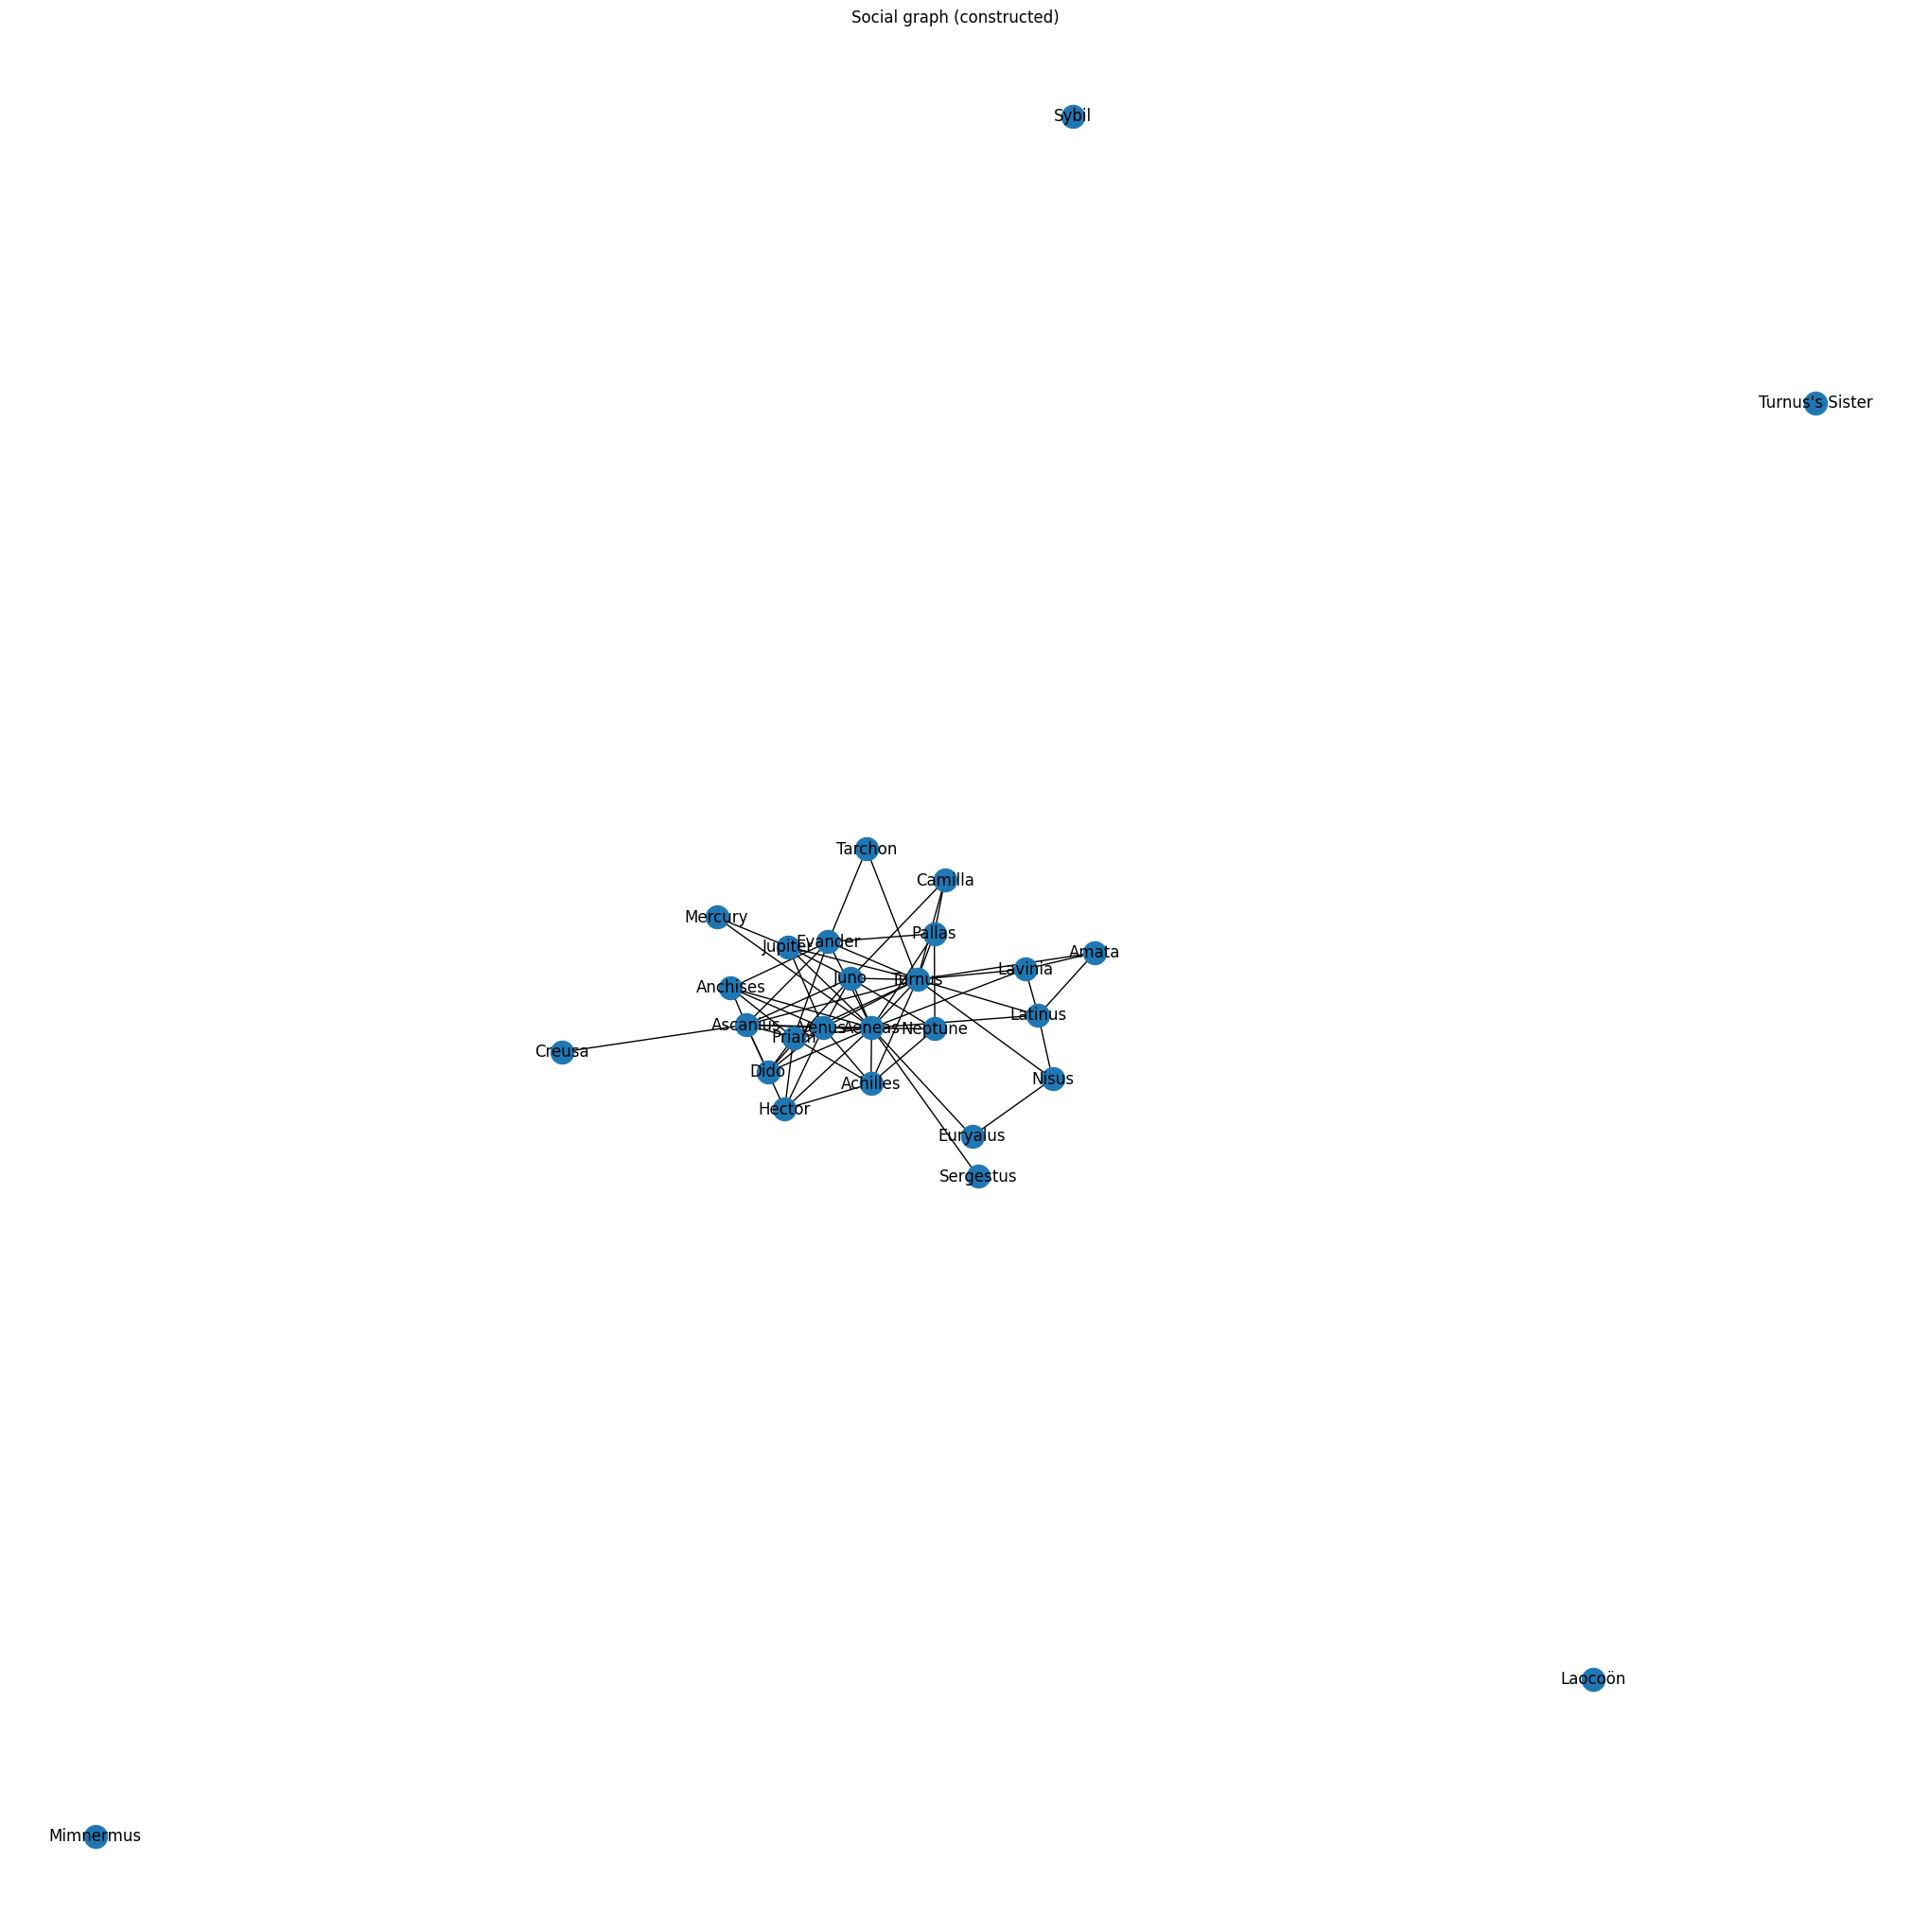

In [7]:
# view graph
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True)
plt.title("Social graph (constructed)")
plt.show()

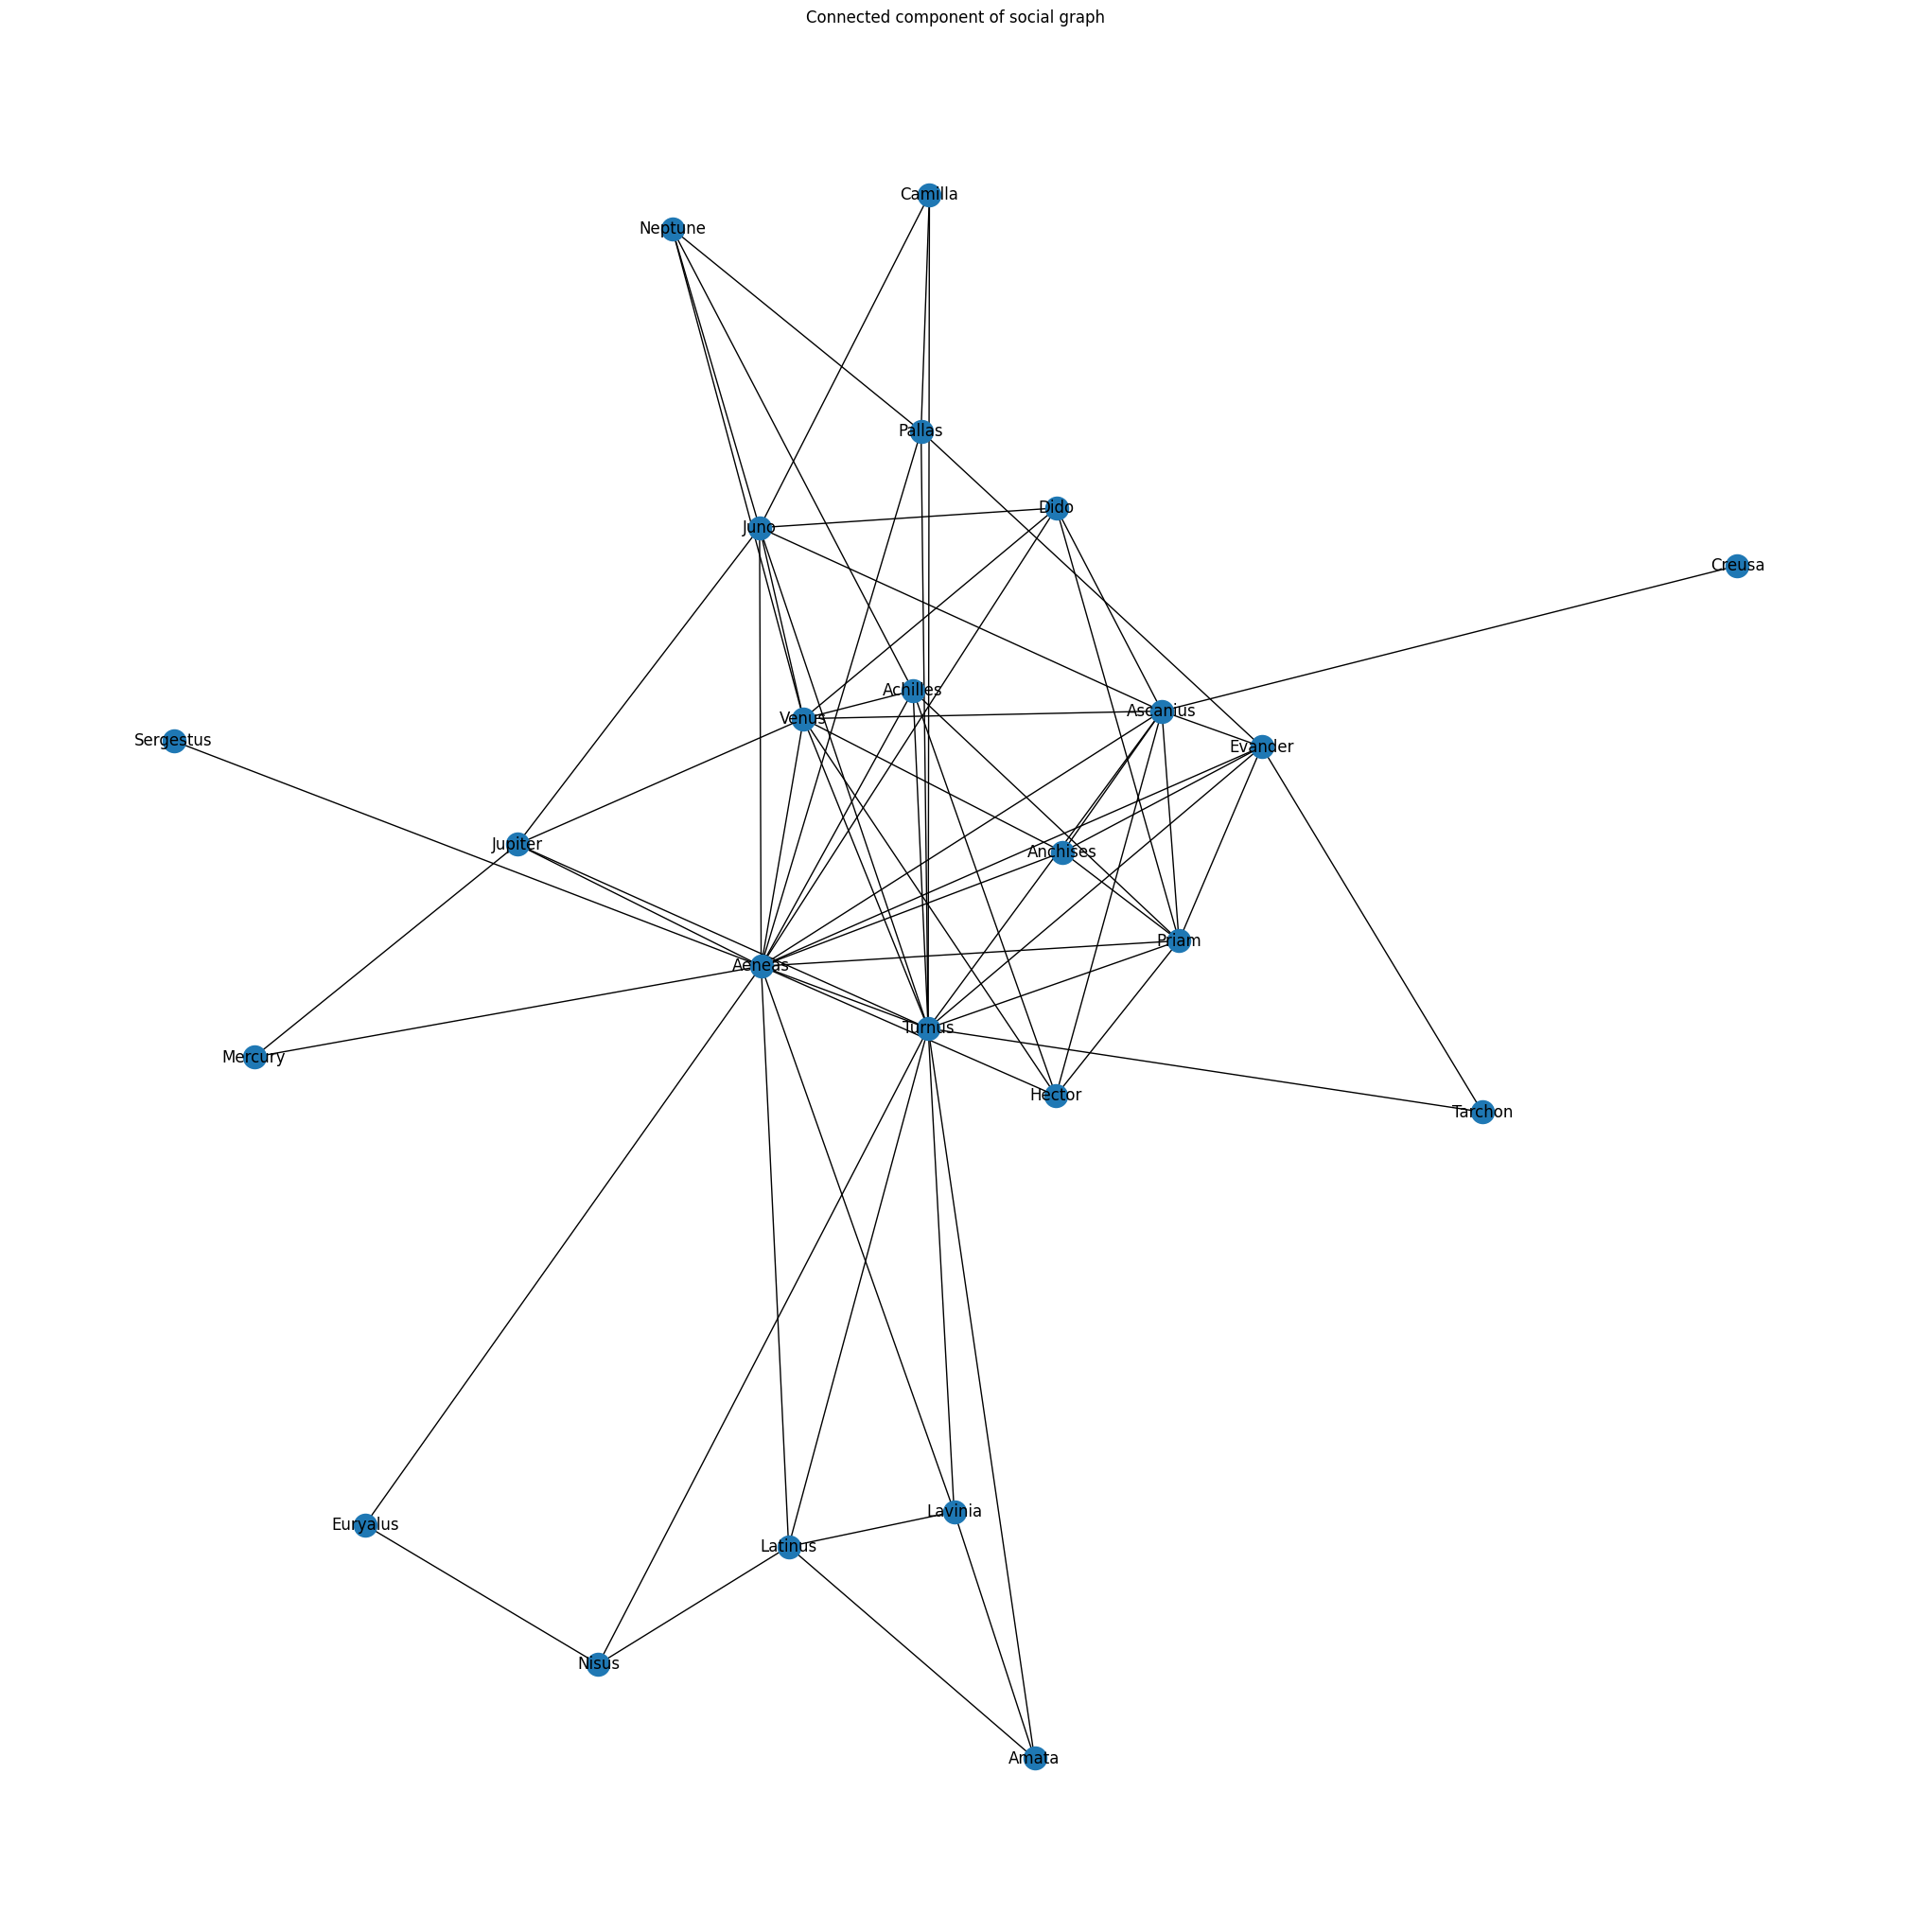

In [8]:
# Get largest connected component
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph containing only the largest connected component
G_connected = G.subgraph(largest_cc).copy()

# view graph clearly
plt.figure(figsize=(20, 20))
nx.draw(G_connected, with_labels=True)
plt.title("Connected component of social graph")
plt.show()

calculate graph metrics using Networkx API

example:

### c. Centrality

In [19]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Aeneas': 0.6296296296296295,
 'Dido': 0.18518518518518517,
 'Turnus': 0.5555555555555556,
 'Juno': 0.2962962962962963,
 'Venus': 0.37037037037037035,
 'Jupiter': 0.18518518518518517,
 'Neptune': 0.14814814814814814,
 'Mercury': 0.07407407407407407,
 'Ascanius': 0.37037037037037035,
 'Anchises': 0.18518518518518517,
 'Creusa': 0.037037037037037035,
 'Laocoön': 0.0,
 'Priam': 0.2962962962962963,
 'Hector': 0.18518518518518517,
 'Achilles': 0.2222222222222222,
 "Turnus's Sister": 0.0,
 'Amata': 0.1111111111111111,
 'Lavinia': 0.14814814814814814,
 'Latinus': 0.18518518518518517,
 'Pallas': 0.18518518518518517,
 'Evander': 0.25925925925925924,
 'Camilla': 0.1111111111111111,
 'Nisus': 0.1111111111111111,
 'Euryalus': 0.07407407407407407,
 'Sybil': 0.0,
 'Mimnermus': 0.0,
 'Tarchon': 0.07407407407407407,
 'Sergestus': 0.037037037037037035}

In [20]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'Aeneas': 0.25369692036358704,
 'Dido': 0.0011192511192511193,
 'Turnus': 0.2015217292995071,
 'Juno': 0.032556640889974224,
 'Venus': 0.03721566499344277,
 'Jupiter': 0.008736942070275403,
 'Neptune': 0.0033238366571699905,
 'Mercury': 0.0,
 'Ascanius': 0.07817347261791709,
 'Anchises': 0.0011192511192511193,
 'Creusa': 0.0,
 'Laocoön': 0.0,
 'Priam': 0.01420205309094198,
 'Hector': 0.0015466015466015469,
 'Achilles': 0.013479627368516257,
 "Turnus's Sister": 0.0,
 'Amata': 0.0,
 'Lavinia': 0.00440238773572107,
 'Latinus': 0.011653778320444987,
 'Pallas': 0.017078189300411523,
 'Evander': 0.022229005562338897,
 'Camilla': 0.0007122507122507123,
 'Nisus': 0.005650522317188983,
 'Euryalus': 0.0038325871659204993,
 'Sybil': 0.0,
 'Mimnermus': 0.0,
 'Tarchon': 0.0,
 'Sergestus': 0.0}

In [21]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'Aeneas': 0.6756066411238826,
 'Dido': 0.4452861952861953,
 'Turnus': 0.6320191158900836,
 'Juno': 0.5155945419103314,
 'Venus': 0.544238683127572,
 'Jupiter': 0.4664902998236332,
 'Neptune': 0.3841684822076979,
 'Mercury': 0.3918518518518519,
 'Ascanius': 0.544238683127572,
 'Anchises': 0.4452861952861953,
 'Creusa': 0.3378033205619413,
 'Laocoön': 0.0,
 'Priam': 0.5155945419103314,
 'Hector': 0.43539094650205756,
 'Achilles': 0.4778681120144535,
 "Turnus's Sister": 0.0,
 'Amata': 0.3841684822076979,
 'Lavinia': 0.4452861952861953,
 'Latinus': 0.4556416881998277,
 'Pallas': 0.4664902998236332,
 'Evander': 0.5023741690408358,
 'Camilla': 0.39984882842025704,
 'Nisus': 0.3918518518518519,
 'Euryalus': 0.39984882842025704,
 'Sybil': 0.0,
 'Mimnermus': 0.0,
 'Tarchon': 0.3841684822076979,
 'Sergestus': 0.3841684822076979}

In [22]:
pagerank = nx.pagerank(G)
pagerank

{'Aeneas': 0.11542161520464561,
 'Dido': 0.03449400541459826,
 'Turnus': 0.10073658822215223,
 'Juno': 0.05390109577818688,
 'Venus': 0.06493104148581016,
 'Jupiter': 0.03650459475404962,
 'Neptune': 0.02931470277805044,
 'Mercury': 0.018074607528718964,
 'Ascanius': 0.06804391701385902,
 'Anchises': 0.03466436108493935,
 'Creusa': 0.01188120263944092,
 'Laocoön': 0.006097560975614245,
 'Priam': 0.052666252437616135,
 'Hector': 0.03454618522614218,
 'Achilles': 0.04079396266167831,
 "Turnus's Sister": 0.006097560975614245,
 'Amata': 0.025066868575050912,
 'Lavinia': 0.03129126658650253,
 'Latinus': 0.03888820847511489,
 'Pallas': 0.036426007957617995,
 'Evander': 0.04856554972875859,
 'Camilla': 0.02372509844439498,
 'Nisus': 0.0266734830241298,
 'Euryalus': 0.019427164787461277,
 'Sybil': 0.006097560975614245,
 'Mimnermus': 0.006097560975614245,
 'Tarchon': 0.01770316961755162,
 'Sergestus': 0.01186880667107228}

# d. Ego Network and local clustering coefficient

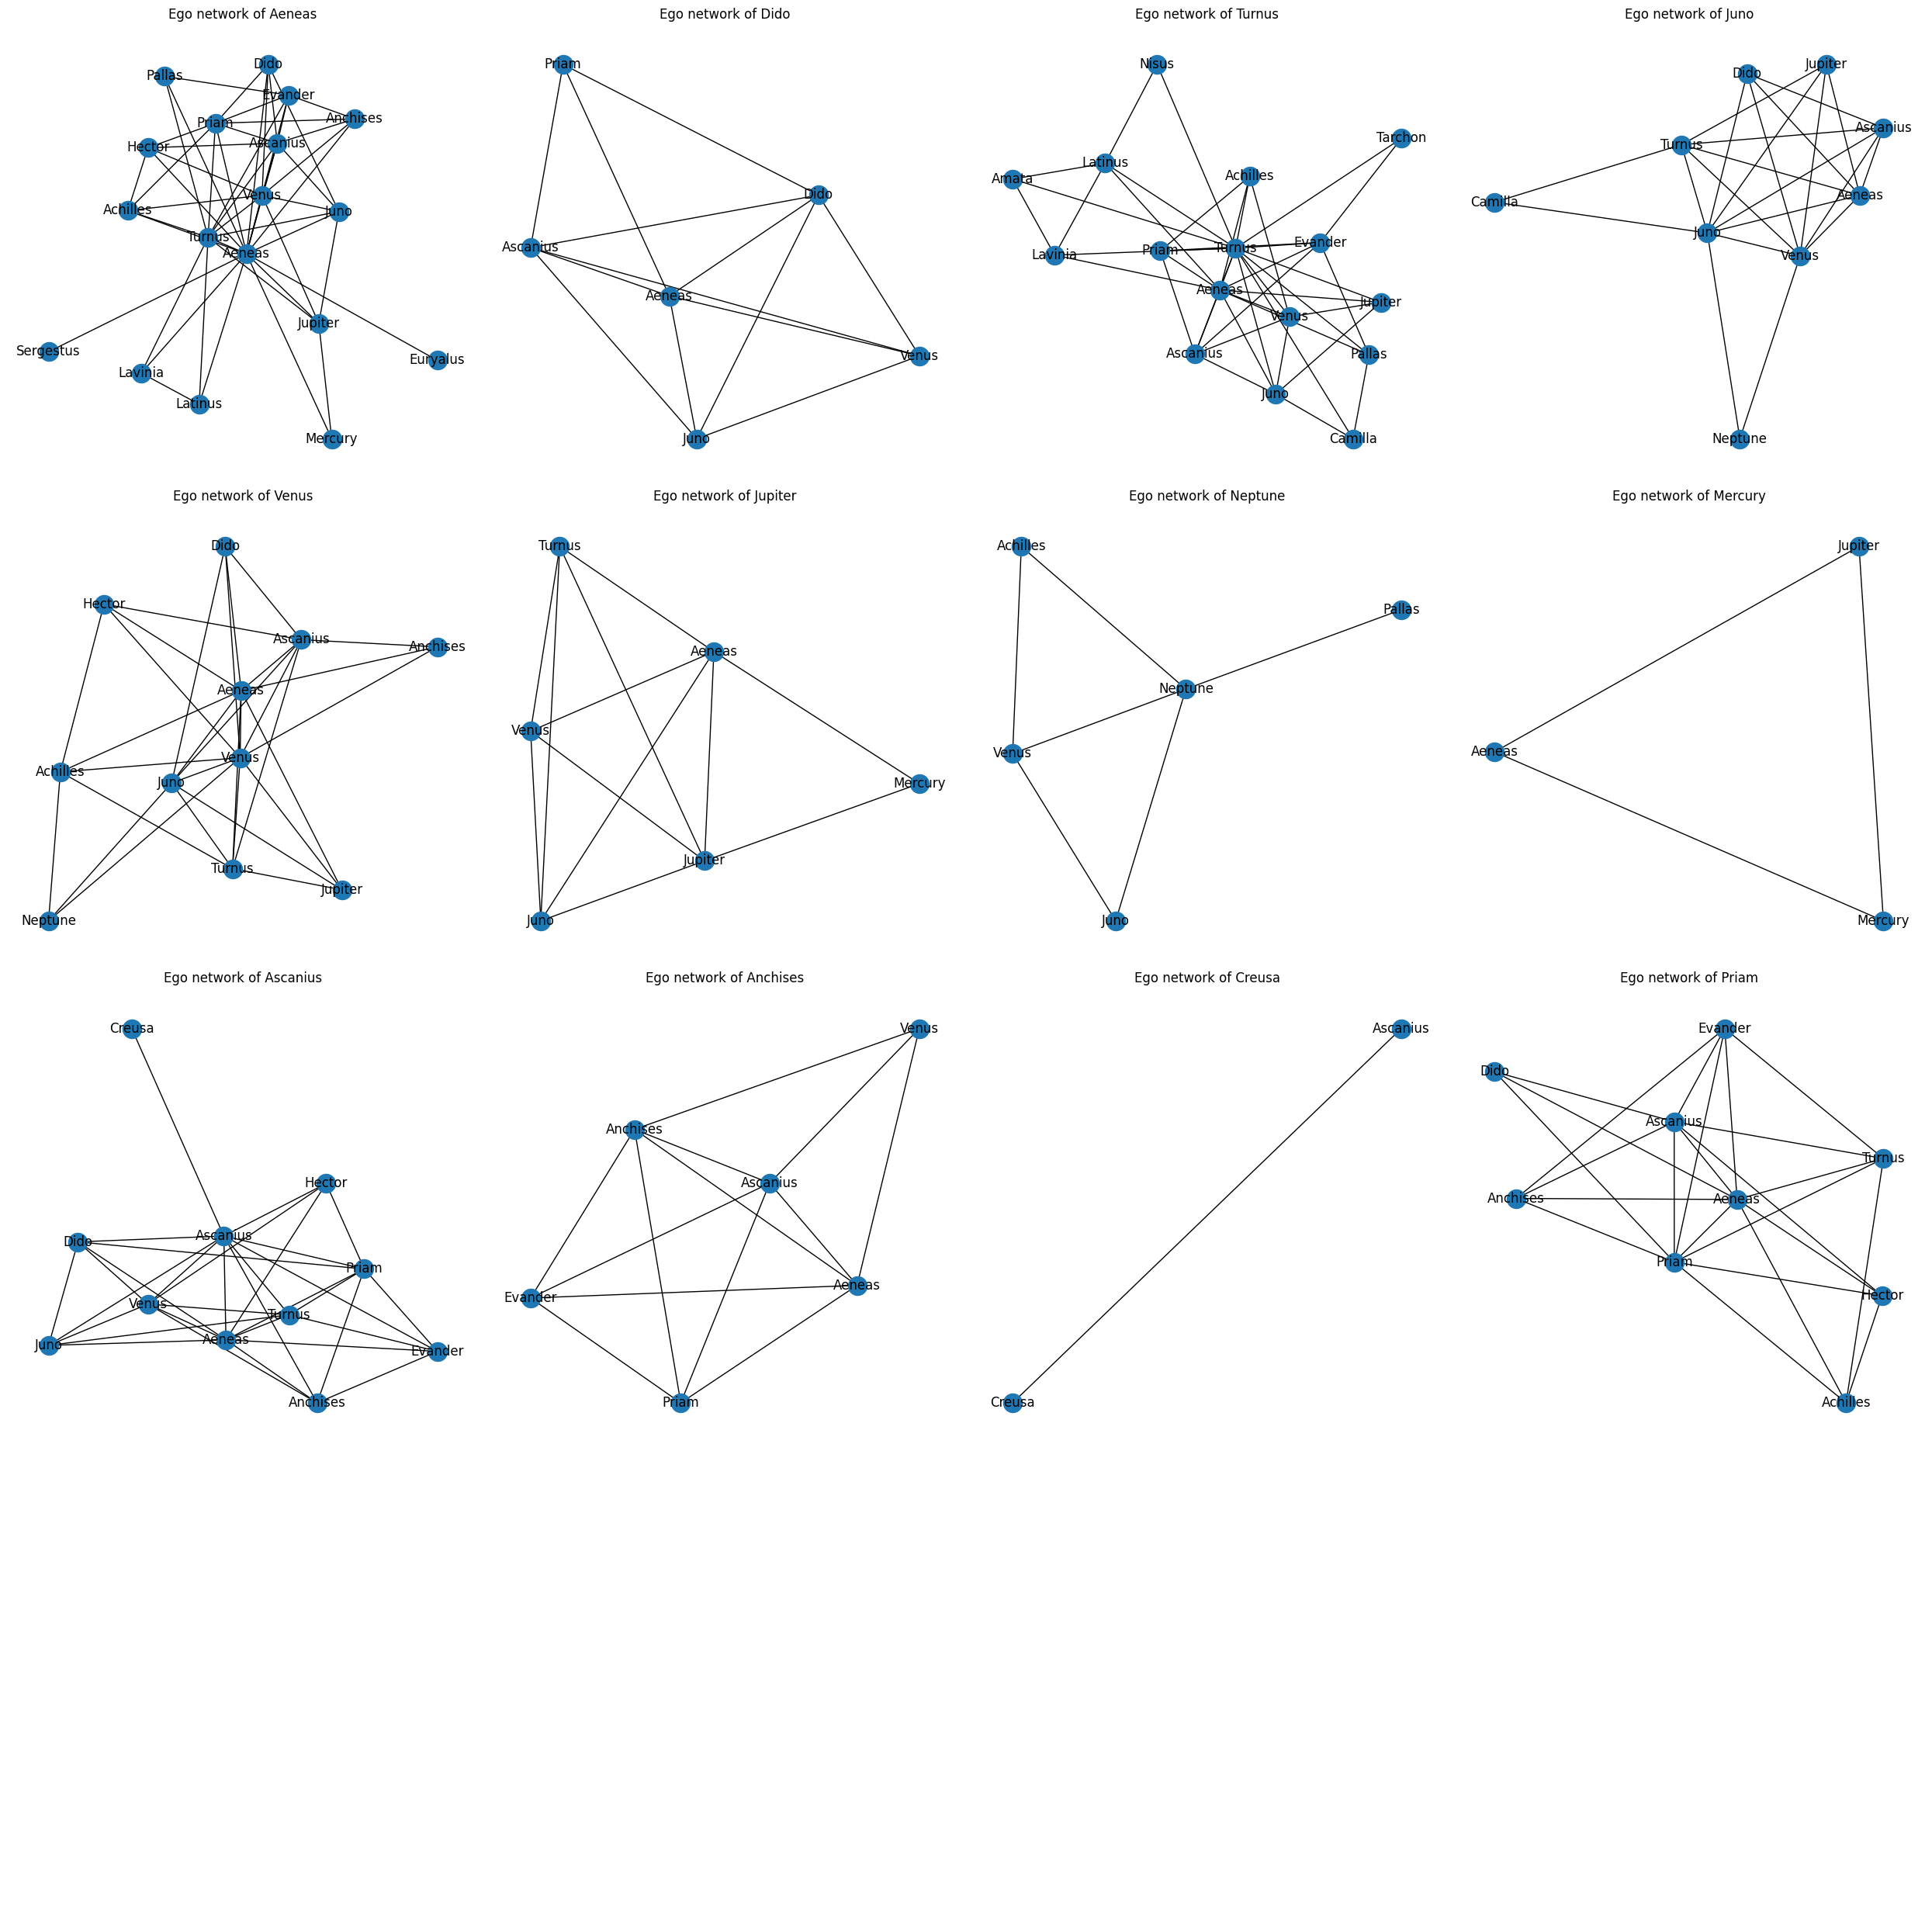

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

main_characters = ['Aeneas', 'Dido', 'Turnus', 'Juno', 'Venus', 'Jupiter',
                   'Neptune', 'Mercury', 'Ascanius', 'Anchises', 'Creusa',
                    'Priam']

fig, axes = plt.subplots(4, 4, figsize=(25, 25))
axes = axes.flatten()

local_clustering_coefficients = {}
for i, char in enumerate(main_characters):
    ego_graph = nx.ego_graph(G, char)
    nx.draw(ego_graph, with_labels=True, ax=axes[i])
    axes[i].set_title(f"Ego network of {char}")
    local_clustering_coefficients[char] = nx.clustering(ego_graph)


for i in range(len(main_characters), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [23]:
for i in local_clustering_coefficients:
    print(f"Local clustering coefficient of {i}: {local_clustering_coefficients[i]}")

Local clustering coefficient of Aeneas: {'Aeneas': 0.25735294117647056, 'Dido': 0.8, 'Turnus': 0.4, 'Juno': 0.8, 'Venus': 0.5277777777777778, 'Jupiter': 0.7, 'Mercury': 1.0, 'Ascanius': 0.6111111111111112, 'Anchises': 0.8, 'Priam': 0.5714285714285714, 'Hector': 0.8, 'Achilles': 0.8, 'Lavinia': 1.0, 'Latinus': 1.0, 'Pallas': 1.0, 'Evander': 0.7333333333333333, 'Euryalus': 0, 'Sergestus': 0}
Local clustering coefficient of Dido: {'Aeneas': 0.8, 'Ascanius': 0.8, 'Dido': 0.8, 'Priam': 1.0, 'Juno': 1.0, 'Venus': 1.0}
Local clustering coefficient of Turnus: {'Aeneas': 0.4, 'Turnus': 0.26666666666666666, 'Juno': 0.6666666666666666, 'Venus': 0.7333333333333333, 'Jupiter': 1.0, 'Ascanius': 0.7333333333333333, 'Priam': 0.8, 'Achilles': 0.8333333333333334, 'Amata': 1.0, 'Lavinia': 0.8333333333333334, 'Latinus': 0.6, 'Pallas': 0.6666666666666666, 'Evander': 0.6, 'Camilla': 0.6666666666666666, 'Nisus': 1.0, 'Tarchon': 1.0}
Local clustering coefficient of Juno: {'Aeneas': 0.8, 'Ascanius': 0.9, 'Nept

### e. Community detection algorithms

#### CPM

Reasons why ***k is considered to be 4*** for implementation of CPM:

* To find tightly-knit communities.
* To have less overlap between communities, a value of k=4 helps with the same.
* Case in particular is a social network, therefore having a value of k=3 or 4 is proven to be beneficial.
* Also depends on the biggest clique size that can be found within the graph


In [11]:
import networkx as nx
from itertools import combinations

def find_k_cliques(graph, k):
    cliques = [clique for clique in nx.find_cliques(graph) if len(clique) >= k]
    return [set(clique) for clique in cliques]

def are_cliques_adjacent(clique1, clique2, k):
    return len(clique1.intersection(clique2)) >= (k - 1)

def clique_percolation_method(graph, k):
    k_cliques = find_k_cliques(graph, k)

    clique_graph = nx.Graph()

    for idx, clique in enumerate(k_cliques):
        clique_graph.add_node(idx, clique=clique)

    for i, j in combinations(range(len(k_cliques)), 2):
        if are_cliques_adjacent(k_cliques[i], k_cliques[j], k):
            clique_graph.add_edge(i, j)

    communities = []
    for component in nx.connected_components(clique_graph):
        community = set()
        for idx in component:
            community.update(k_cliques[idx])
        communities.append(community)

    return communities

k = 4

communities = clique_percolation_method(G_connected, k)

for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")


Community 1: {'Aeneas', 'Ascanius', 'Anchises', 'Dido', 'Turnus', 'Priam', 'Hector', 'Achilles', 'Juno', 'Jupiter', 'Evander', 'Venus', 'Pallas'}
Community 2: {'Aeneas', 'Lavinia', 'Amata', 'Turnus', 'Latinus'}


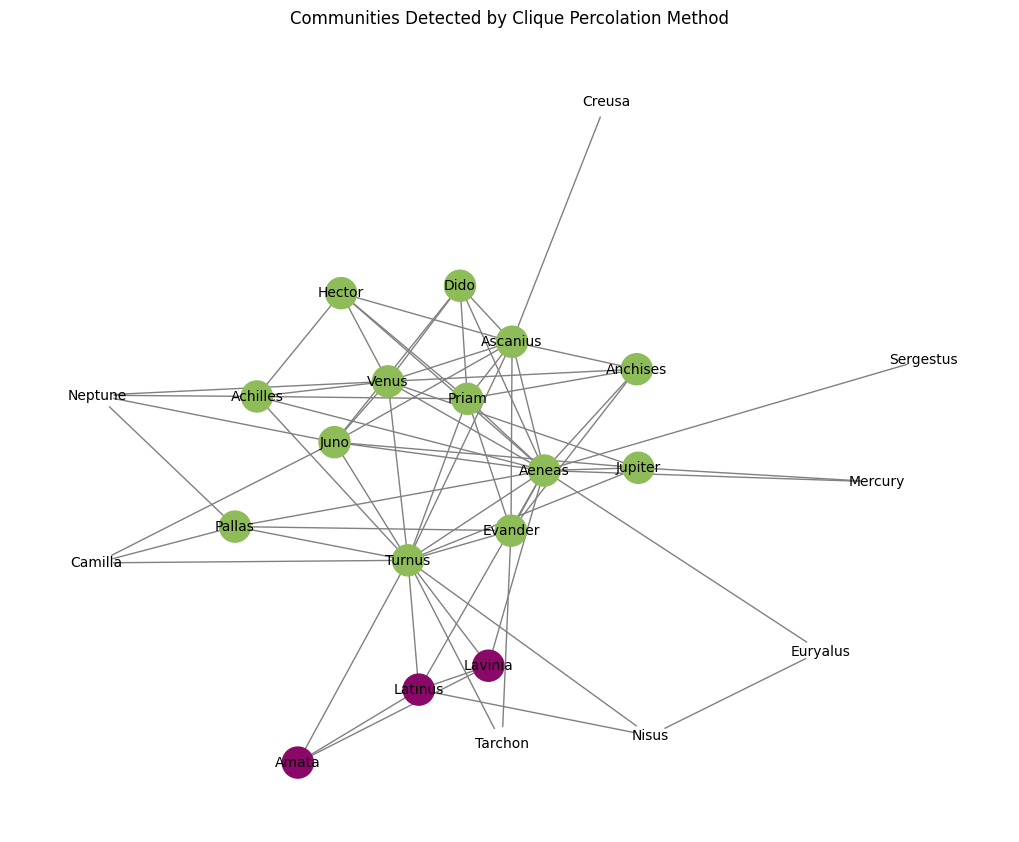

In [12]:
# To visualize the communities

import random

def visualize_communities(graph, communities):
    pos = nx.spring_layout(graph)

    colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(communities))]

    node_color_map = []
    for node in graph.nodes():
        for i, community in enumerate(communities):
            if node in community:
                node_color_map.append(colors[i])
                break
        else:
            node_color_map.append('#FFFFFF')

    plt.figure(figsize=(10,8))

    nx.draw(graph, pos, node_color=node_color_map, with_labels=True, node_size=500, font_size=10, edge_color='gray')

    plt.title("Communities Detected by Clique Percolation Method")
    plt.show()

visualize_communities(G_connected, communities)

#### Girvan Newman

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import matplotlib.colors as mcolors

def girvan_newman_communities(graph, num_communities):
    comp_gen = girvan_newman(graph)
    for i, communities in enumerate(comp_gen):
        if len(communities) == num_communities:
            return [list(community) for community in communities]

num_communities = 7

communities = girvan_newman_communities(G_connected, num_communities)

for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")


Community 1: ['Aeneas', 'Ascanius', 'Neptune', 'Anchises', 'Dido', 'Hector', 'Priam', 'Turnus', 'Achilles', 'Juno', 'Jupiter', 'Camilla', 'Evander', 'Venus', 'Pallas']
Community 2: ['Mercury']
Community 3: ['Creusa']
Community 4: ['Amata', 'Latinus', 'Lavinia']
Community 5: ['Euryalus', 'Nisus']
Community 6: ['Tarchon']
Community 7: ['Sergestus']


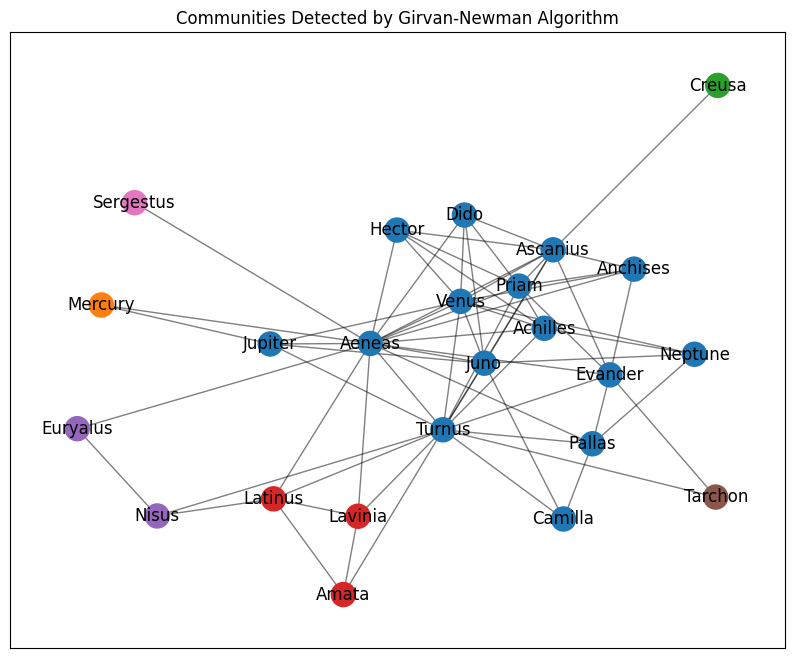

In [14]:
# To visualize what the communities look like

def plot_girvan_newman_communities(graph, communities):
    pos = nx.spring_layout(graph)
    color_map = list(mcolors.TABLEAU_COLORS.values())
    node_colors = {}

    for i, community in enumerate(communities):
        color = color_map[i % len(color_map)]
        for node in community:
            node_colors[node] = color

    node_list = list(node_colors.keys())
    node_color_list = [node_colors[node] for node in node_list]

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(graph, pos, nodelist=node_list, node_color=node_color_list, node_size=300)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)

    plt.title("Communities Detected by Girvan-Newman Algorithm")
    plt.show()

plot_girvan_newman_communities(G_connected, communities)

After experimenting with different values for number of communities, the value of 7 gave us the most appropriate representation corresponding to CPM

Why did we observe communities formed being similar to the ones obtained by CPM:
* If the underlying community structure of the graph is relatively simple, both the algorithms can identify similar community partitions, especially if the number of communities is matching to the actual number of communities in the graph

### f. Equivalent Generative Models

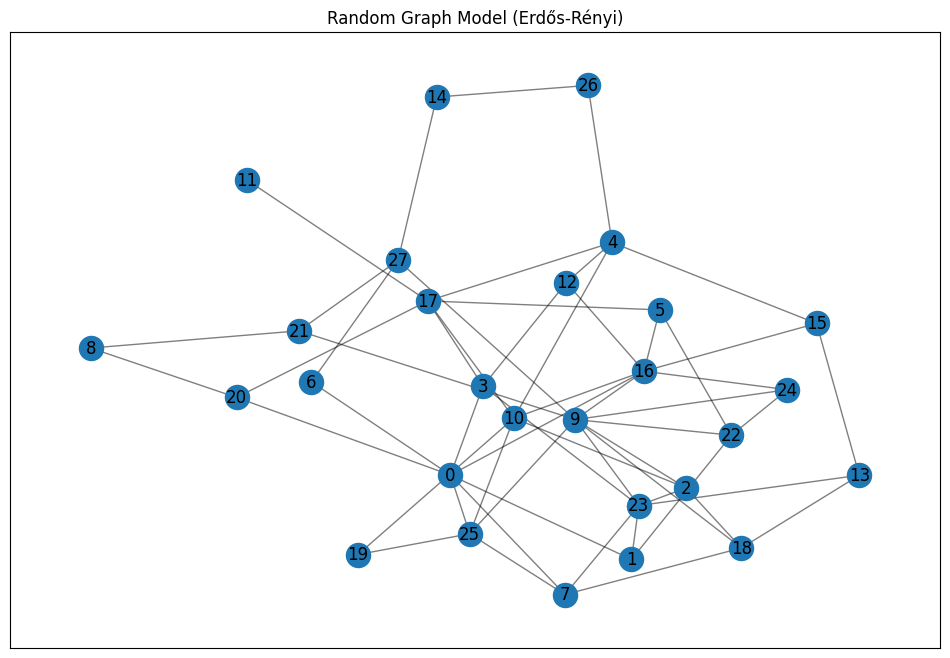

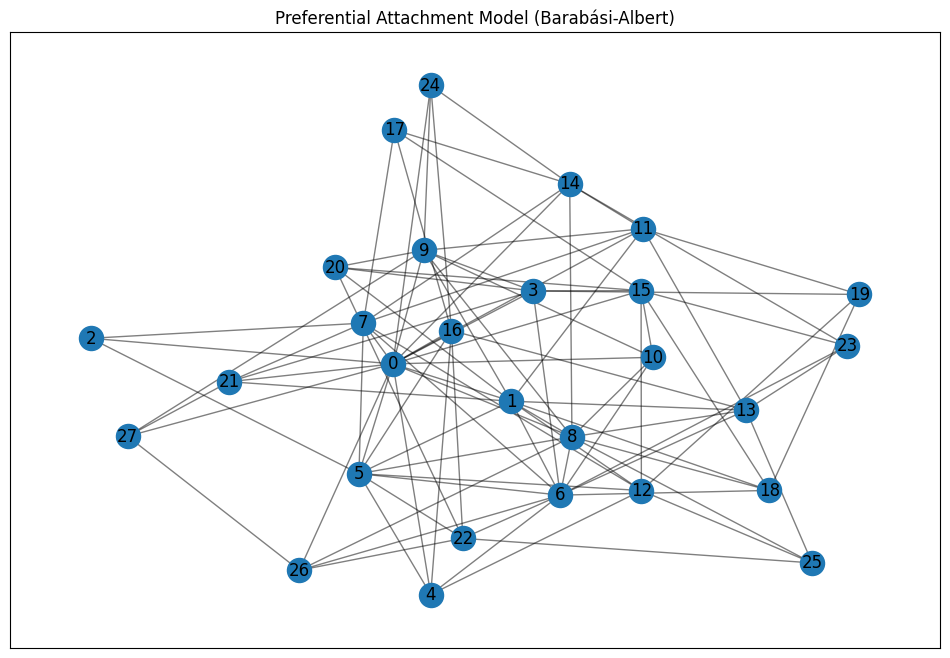

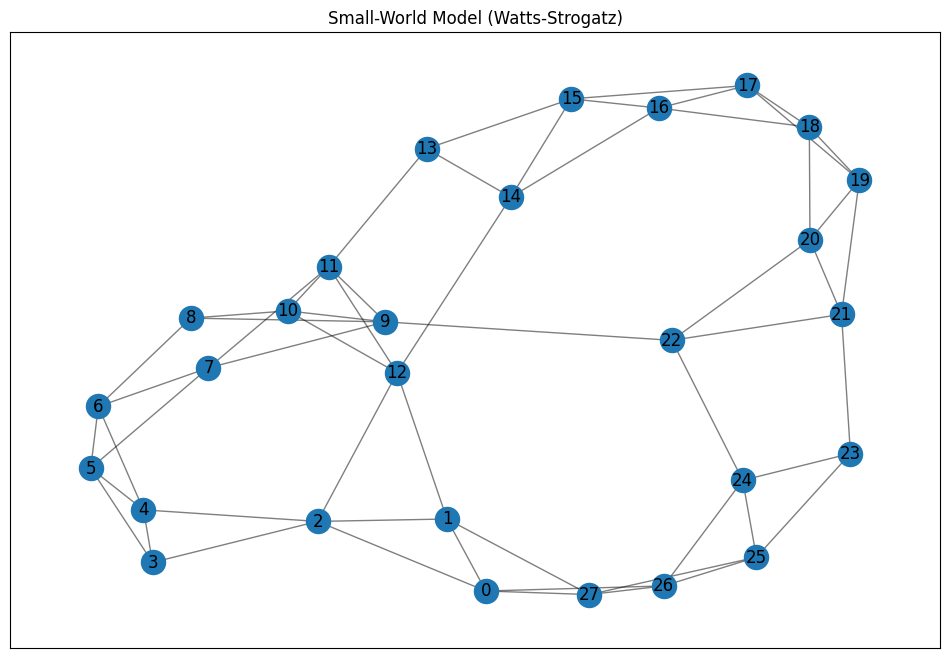

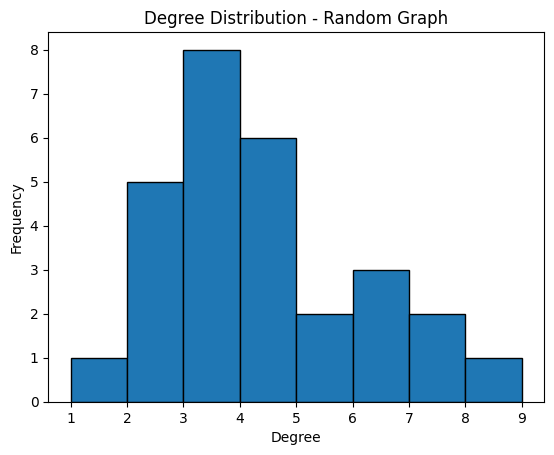

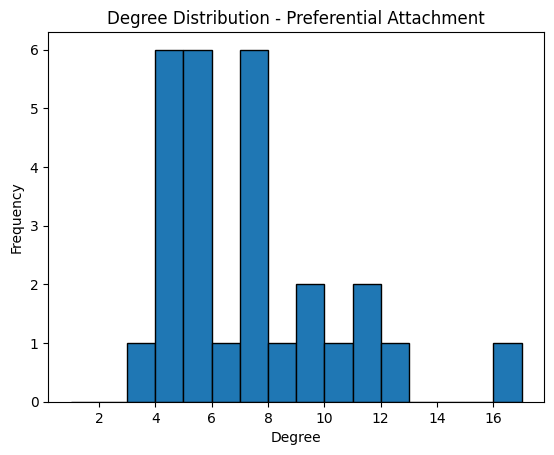

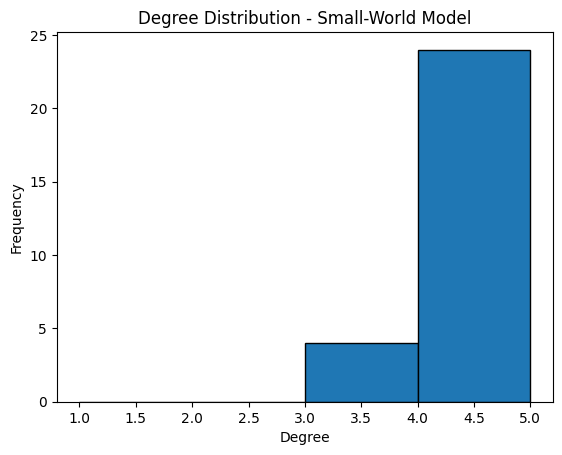

In [17]:
n = G.number_of_nodes()  # I have taken the original graph without removing the stuff that were "outliers" cuz we need to kinda show those points as well
# For reference
# p = 0.1
# m = 3
# k = 4
avg_degree = sum(dict(G.degree()).values()) / len(G.nodes())

G_random = nx.erdos_renyi_graph(n, avg_degree/n)
G_preferential = nx.barabasi_albert_graph(n, int(avg_degree))
G_small_world = nx.watts_strogatz_graph(n, int(avg_degree), 0.1)

# Tweak the values of p, m and k as needed

def plot_graph(graph, title):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph)  # Layout for visualization
    nx.draw_networkx_nodes(graph, pos, node_size=300)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)
    plt.title(title)
    plt.show()

# Plot the generated graphs
plot_graph(G_random, "Random Graph Model (Erdős-Rényi)")
plot_graph(G_preferential, "Preferential Attachment Model (Barabási-Albert)")
plot_graph(G_small_world, "Small-World Model (Watts-Strogatz)")

# Additional comparison (e.g., degree distributions)
def plot_degree_distribution(graph, title):
    degrees = [d for n, d in graph.degree()]
    plt.hist(degrees, bins=range(1, max(degrees) + 1), edgecolor='black')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# Plot degree distributions for comparison
plot_degree_distribution(G_random, "Degree Distribution - Random Graph")
plot_degree_distribution(G_preferential, "Degree Distribution - Preferential Attachment")
plot_degree_distribution(G_small_world, "Degree Distribution - Small-World Model")


# Could also check metrics such as average path length and clustering coefficient for comparisons with our original graph

## Part - 2

### Analysis

### a. Who are the protagonists in the story? Interpret the 4 centralities.
#### Protagonists in The Aeneid

The central characters in *The Aeneid* are well-reflected in the network analysis. The story revolves around **Aeneas**, a Trojan hero, as he embarks on his journey to find a new homeland after the fall of Troy, guided by the will of the gods. Other key figures include:

- **Dido**: Queen of Carthage
- **Turnus**: The primary antagonist in the later books
- **Juno**: Who opposes Aeneas
- **Venus**: Aeneas’s divine mother

#### Degree Centrality (Interpretation)

- **Aeneas** has the highest degree centrality at **0.629**, marking him as the most connected character in the graph. This matches the narrative, as he interacts with nearly every other major character, reflecting his role as the protagonist.

- **Turnus** (0.555) and **Venus** (0.370) also have high degree centralities, as Turnus opposes Aeneas in the final conflict and Venus supports him throughout the story.

- **Juno** (0.296) plays a significant role as she continuously interferes with Aeneas’s journey.

These centralities highlight the prominence of these characters. Degree centrality represents how well-connected a character is, and it aligns well with the roles of the major characters: Aeneas as the main hero, Turnus as his adversary, and Juno and Venus as divine forces in conflict.

### b. How “realistic” is the story based on your comparison with the equivalent Generative Model, i.e., fact or fiction?

The analysis of the network provides insight into the realism of the story when compared to real-world social networks or even generative models based on real-life data. Some key aspects to consider:

#### Dense Network Structure

The network is densely connected, with **68 edges** and **28 nodes**. In a realistic social network, protagonists like Aeneas would likely have high connectivity due to his leadership role. However, the degree of interconnectedness between gods (like **Juno**, **Venus**, **Jupiter**) and mortals (such as **Aeneas**, **Turnus**, and **Ascanius**) indicates that this narrative is rooted in mythology and fiction. In a real-world generative model, you'd expect more clustering among similar groups (e.g., family, allies) and fewer direct connections between such different entities as gods and humans.

#### Divine-Mortal Relationships

The prominent role of divine figures like **Juno** and **Venus** shows that the network reflects a fictional mythological world where gods intervene directly in human affairs. If a generative model based on real-world interactions were to produce a network, you'd likely observe fewer direct interactions between characters of such differing "domains" (i.e., divine and mortal). This interweaving of gods and humans creates an unrealistic aspect, signaling the mythological nature of *The Aeneid*.

#### Generative Model Insight

If a generative model based on real-world data were to create a similar graph, we would expect to see fewer cross-domain interactions (e.g., gods influencing human actions so directly). Instead, real-world leaders or protagonists would interact primarily with other humans in tightly knit groups. The high number of connections between divine and mortal figures in this network deviates from the more segmented or clustered structure typically seen in realistic social networks.

Thus, the network reflects a fictional world where the interaction between gods and humans is central to the plot—something that wouldn't happen in a generative model based on real-world social data. This blending of divine and mortal interactions highlights the mythological, fictional foundation of *The Aeneid*, as compared to the patterns of interaction found in more realistic, human-centric narratives.

### c. Does your graph analytics capture the twists in the story in any way?

#### Community Detection (CPM and Girvan Newman)

The **CPM** output shows a strong community involving **Aeneas**, **Turnus**, **Venus**, **Juno**, and other major figures, effectively capturing the conflict between Aeneas and Turnus, with divine interference from Juno and Venus. This aligns with the major plot arc in which divine forces shape the fate of mortals.

The **Girvan-Newman** algorithm breaks the graph into smaller, more isolated communities:

- **Community 1**: Comprising Aeneas, Dido, Hector, etc., this community reflects the Trojan war survivors and the immediate connections Aeneas forms.

- **Community 4**: Including Latinus, Amata, and Lavinia, this community represents the Italian royals connected to Aeneas’s later journey, illustrating the transition to the war in Italy.

- **Community 5**: Capturing Nisus and Euryalus, this smaller community highlights the subplot of their close friendship and heroism.

The community structure effectively captures the multiple arcs of the narrative, particularly the shift from the Trojan setting to the conflict in Italy, as well as smaller character arcs.

#### Twists in the Story

The graph also reflects major twists in the narrative:

- The disconnection of Dido from Aeneas after their interaction is evident through her relatively low degree centrality and her placement in a smaller community. This aligns with her tragic fate following Aeneas's departure from Carthage.

- The separate community of Lavinia and Amata illustrates the Italian royal subplot and their isolation from the main story until the final act.

Thus, the graph analysis successfully captures key turning points in the narrative, such as Dido’s tragic departure, the Italian subplot, and the divine interventions that punctuate the story.